#Task 1: Framing the Business Scenario

##Questions for the CEO:

###1.	What is the total revenue generated by the company, and how does it vary across different countries?



###2.	Which products or categories have the highest sales volume, and what trends can we observe?


###3.	Are there any notable patterns in customer purchasing behavior (e.g., repeat customers, bulk purchases)?


###4.	How can operational inefficiencies (e.g., inventory or stock issues) be identified and addressed?

##Questions for the CMO:

###1.	Which products generate the highest revenue, and how effective are marketing efforts for these products?



###2.	Are there specific customer demographics or regions with higher engagement that should be targeted?


###3.	What trends in product descriptions or categories indicate shifting customer preferences?


###4.	How can marketing campaigns be optimized to increase customer retention and attract new customers?

#Task 2: Choosing the Right Visuals

##The CEO of the retail store is interested to view the time series of the revenue data for the entire year. The CEO is interested in viewing the seasonal trends and wants to dig deeper into why these trends occur. This analysis will be helpful for the CEO to forecast for the next year. Which visual would most likely help the CEO analyse the data?

###Line chart

##The CMO is interested in viewing the top 10 countries which are generating the highest revenue. Additionally, as a subcomponent, they would also like to see which products are contributing to the total revenue being generated by each country. Which visual would enable the CMO to view the revenue for each country and the breakdown by products on a single chart?

###Stacked bar chart

##The CEO of the online retail store wants to see how much average revenue is generated by each country. They are interested in viewing the following metrics on the visual: Minimum value First quartile value Median value Third quartile value Maximum value Which chart would you create to show the above metrics for the average revenue generated by each country?

###Boxplot

##The CMO of the online retail store wants to view the information on the top 10 customers by revenue. They are interested in a visual that shows the greatest revenue-generating customer at the start and gradually declines to the lower revenue-generating customers. The CMO wants to target the higher revenue-generating customers and ensure that they remain satisfied with their products. Which visual would help the CMO understand the data on revenue generated by the top 10 customers?

###Column chart

##The CEO is looking to gain insights on the demand for their products. They want to look at all countries and see which regions have the greatest demand for their products. Once the CEO gets an idea of the regions that have high demand, they will initiate an expansion strategy which will allow the company to target these areas and generate more business from these regions. He wants to view the entire data on a single view without the need to scroll or hover over the data points to identify the demand. Which chart would be most useful to provide the CEO information on the demand in each region?

###Map chart

#Task 3: Creating Effective Visuals

In [2]:
#Install Required Libraries
!pip install pandas matplotlib seaborn openpyxl

In [3]:
#Data Cleanup
import pandas as pd

In [4]:
# Load the dataset
file_path = 'Online Retail.xlsx'  # Adjust this to the path of your uploaded file
data = pd.read_excel(file_path)

In [5]:
# Clean the data
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [6]:
# Add a Revenue column
data['Revenue'] = data['Quantity'] * data['UnitPrice']

In [7]:
# Preview the cleaned data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
import matplotlib.pyplot as plt

In [9]:
# Filter for 2011
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data_2011 = data[data['InvoiceDate'].dt.year == 2011]

In [10]:
# Aggregate revenue by month
data_2011['Month'] = data_2011['InvoiceDate'].dt.to_period('M')
monthly_revenue = data_2011.groupby('Month')['Revenue'].sum()

<ipython-input-10-eabbc5507f6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011['Month'] = data_2011['InvoiceDate'].dt.to_period('M')


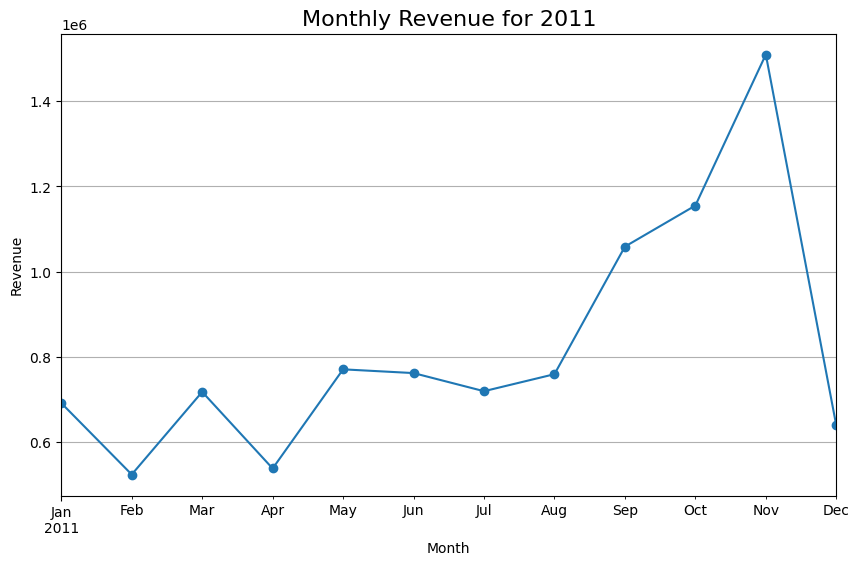

In [11]:
# Plot the time series
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title('Monthly Revenue for 2011', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [12]:
# Exclude the United Kingdom and group by Country
data_no_uk = data[data['Country'] != 'United Kingdom']
country_revenue = data_no_uk.groupby('Country').agg({'Revenue': 'sum', 'Quantity': 'sum'})


In [13]:
# Select top 10 countries by revenue
top_10_countries = country_revenue.sort_values(by='Revenue', ascending=False).head(10)

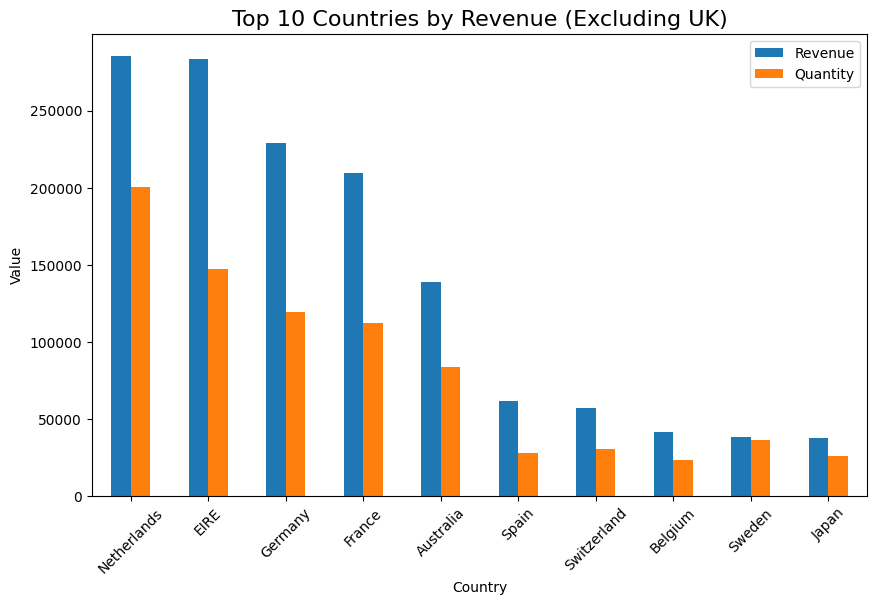

In [14]:
# Plot
top_10_countries[['Revenue', 'Quantity']].plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Countries by Revenue (Excluding UK)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Group by CustomerID
customer_revenue = data.groupby('CustomerID')['Revenue'].sum()

In [16]:
# Select top 10 customers
top_10_customers = customer_revenue.sort_values(ascending=False).head(10)

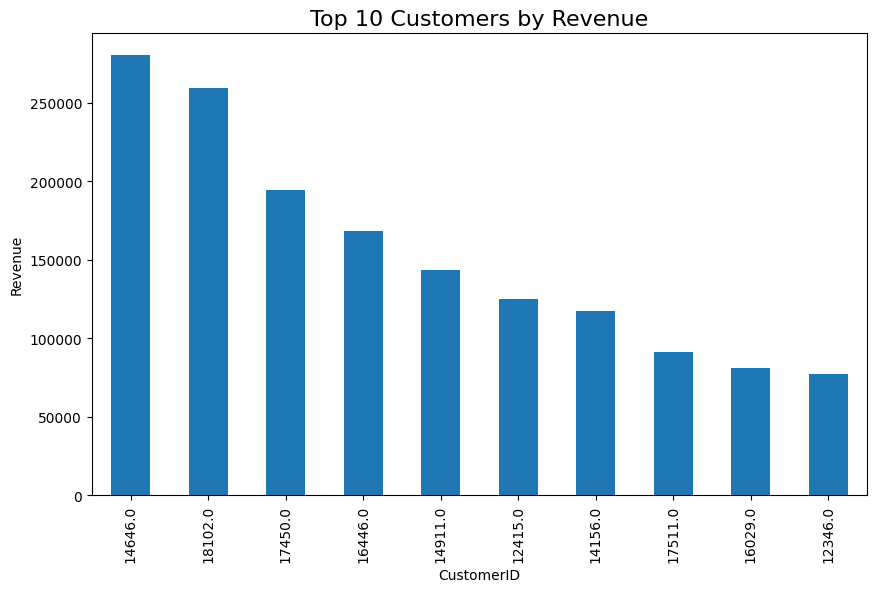

In [17]:
# Plot
top_10_customers.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Customers by Revenue', fontsize=16)
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.show()

In [18]:
# Exclude UK and group by Country
demand_by_country = data_no_uk.groupby('Country')['Quantity'].sum()

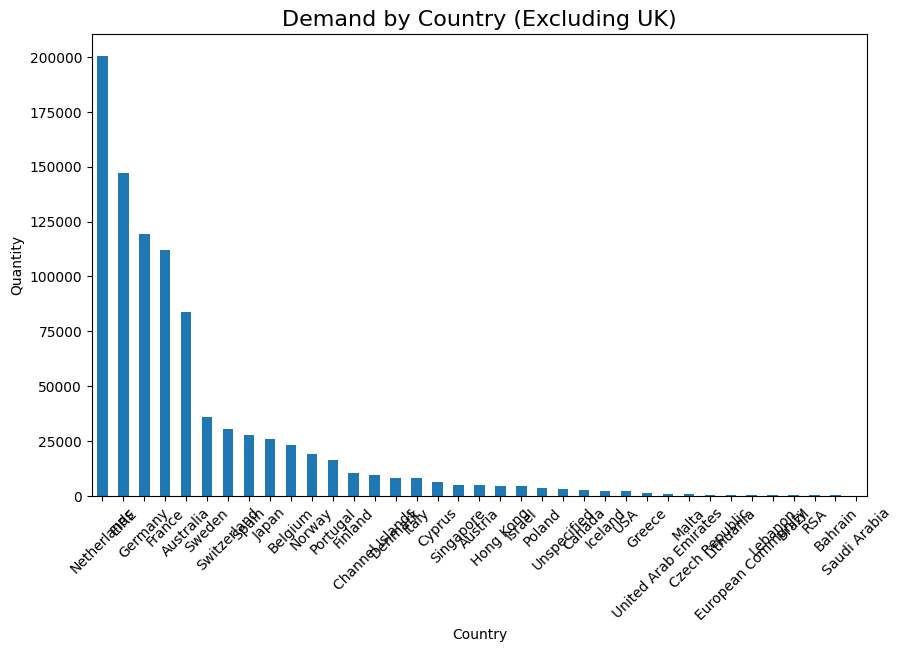

In [19]:
# Plot
plt.figure(figsize=(10, 6))
demand_by_country.sort_values(ascending=False).plot(kind='bar')
plt.title('Demand by Country (Excluding UK)', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

In [20]:
plt.savefig('filename.png')


<Figure size 640x480 with 0 Axes>